Breast cancer detection data-set is extracted from uci repository.
In this notebook, SVM classification model is used to classify a cell as either benign or malignant. Performance of the model is evaluated using accuracy matrices. 

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


As indicated by df.info(), data-frame contains 699 rows and 11 columns.Column named as "id", denotes cell id and contains 699 unique values. Cell id doesn't provide any information based on which benign and malignant cells can be differentiated. This column is dropped and column containing information about cell-id is not considered in any further analysis.

In [3]:
df = df.drop(columns=["id"])
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

Here we notice, that for data frame with bare_nuclei column, 16 values are missing (filled with string value "?"). Here either we can drop these rows or else we can generate these missing values using remaining data. This is done using K-nearest neighbour algorithm. These 16 rows are initially dropped, and based on other 683 rows these 16 values are predicted. 

In [5]:
import numpy as np
df_absent = df[df['bare_nuclei']=='?']
df_absent = df_absent.reset_index()
df_absent = df_absent.drop(columns=['index'])
df_absent.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,8,4,5,1,2,?,7,3,1,4
1,6,6,6,9,6,?,7,8,1,2
2,1,1,1,1,1,?,2,1,1,2
3,1,1,3,1,2,?,2,1,1,2
4,1,1,2,1,3,?,1,1,1,2


In [6]:
df_present = df[df['bare_nuclei']!='?']
df_present = df_present.reset_index()
df_present = df_present.drop(columns=["index"])
df_present = df_present.astype(np.float64)
df_present.head()


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [7]:
df_present_temp = df_present.drop(columns=['bare_nuclei'])
xm = df_present_temp.values

ym = df_present['bare_nuclei'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(xm, ym, test_size=0.2, random_state=4)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

k_min = 2
test_MAE_array = []
k_array = []
MAE = 10^12

for k in range(2, 20):
    model = KNeighborsRegressor(n_neighbors=k).fit(train_x, train_y)
    
    y_predict = model.predict(test_x)
    y_true = test_y

    test_MAE = mean_absolute_error(y_true, y_predict)
    if test_MAE < MAE:
        MAE = test_MAE
        k_min = k

    test_MAE_array.append(test_MAE)
    k_array.append(k)

plt.plot(k_array, test_MAE_array,'r')
plt.show()

print("Best k parameter is ",k_min )

<Figure size 640x480 with 1 Axes>

Best k parameter is  16


In [9]:
final_model = KNeighborsRegressor(n_neighbors=16).fit(xm,ym)

In [10]:
df_absent_temp = df_absent.drop(columns=['bare_nuclei'])
df_absent_temp = df_absent_temp.astype(np.float64)
df_absent_temp.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
0,8.0,4.0,5.0,1.0,2.0,7.0,3.0,1.0,4.0
1,6.0,6.0,6.0,9.0,6.0,7.0,8.0,1.0,2.0
2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
3,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0
4,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0


In [11]:
x_am = df_absent_temp.values
y_am = final_model.predict(x_am)
y_am

array([6.8125, 8.25  , 1.    , 1.    , 1.4375, 1.0625, 1.    , 1.1875,
       1.1875, 7.5   , 1.0625, 1.4375, 7.5   , 1.1875, 1.    , 1.5   ])

These are the 16 bare_nuclei values generated using KNN algorithm. 

In [12]:
y_am = np.round(y_am)
y_am = y_am.astype(np.int64)
y_am

array([7, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 8, 1, 1, 2])

In [13]:
df_pred = pd.DataFrame({'bare_nuclei':y_am})
data_frame_1 = df_absent_temp.join(df_pred)
data_frame_1 = data_frame_1.astype(np.int64)
data_frame_1

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclei
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1
5,5,1,1,1,2,3,1,1,2,1
6,3,1,4,1,2,3,1,1,2,1
7,3,1,1,1,2,3,1,1,2,1
8,3,1,3,1,2,2,1,1,2,1
9,8,8,8,1,2,6,10,1,4,8


In [14]:
df_join_2 = df_present['bare_nuclei']
data_frame_2 = df_present_temp.join(df_join_2)
data_frame_2 = data_frame_2.astype(np.int64)
data_frame_2.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclei
0,5,1,1,1,2,3,1,1,2,1
1,5,4,4,5,7,3,2,1,2,10
2,3,1,1,1,2,3,1,1,2,2
3,6,8,8,1,3,3,7,1,2,4
4,4,1,1,3,2,3,1,1,2,1


In [15]:
data_frame = [data_frame_1, data_frame_2]
data_frame = pd.concat(data_frame)
data_frame.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclei
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1


Class column denotes whether cell is benign or malignant. "2" denotes benign class while "4" denotes malignant class. Let's determine the number of benign and malignant classes in the data-set.

In [16]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

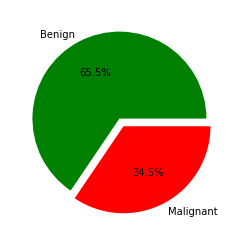

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.pie(df['class'].value_counts(),explode=(0,0.1), autopct='%1.1f%%', labels = ['Benign', 'Malignant'], colors=['g','r'])
plt.axis = 'equal'

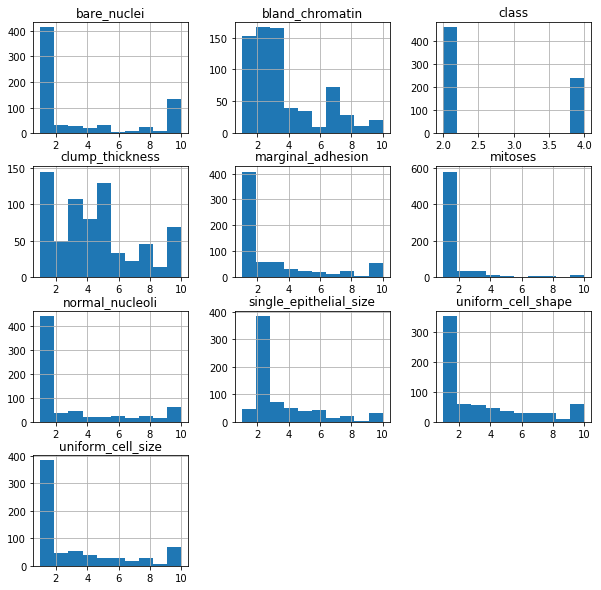

In [18]:
data_frame.hist(figsize = (10, 10))
plt.show()

In [19]:
data_frame_1 = data_frame

def num_to_class(x):
    if x==2:
        return 'Benign'
    elif x==4:
        return 'Malignant'

data_frame_1['class'] = data_frame_1['class'].apply(lambda x: num_to_class(x))
data_frame_1['class'].value_counts()


Benign       458
Malignant    241
Name: class, dtype: int64

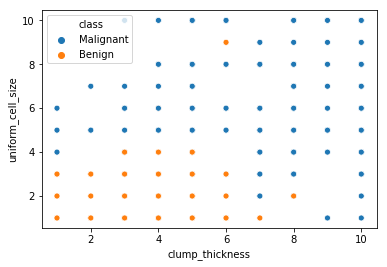

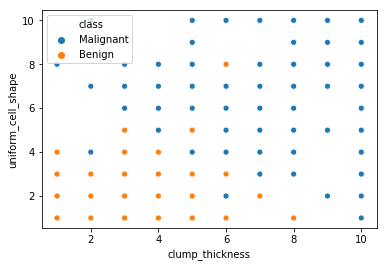

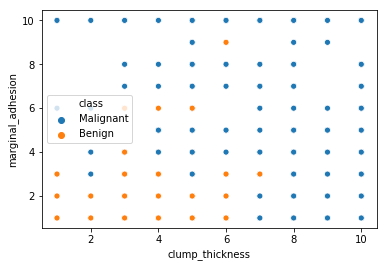

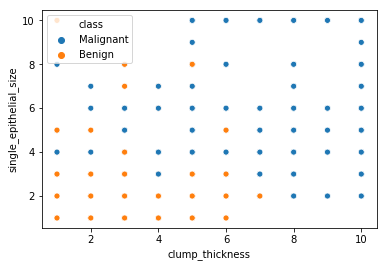

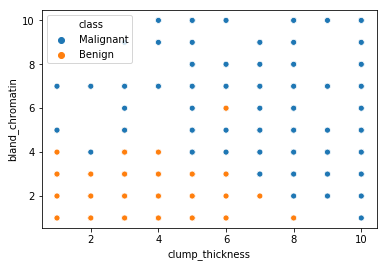

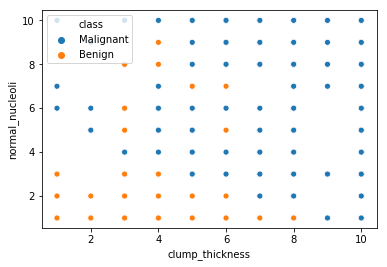

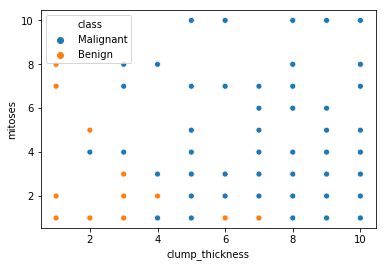

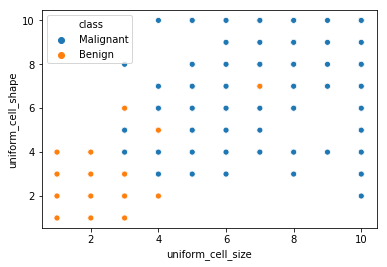

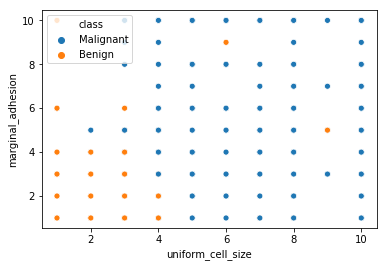

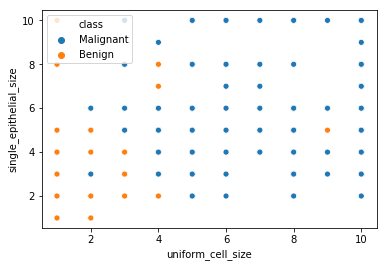

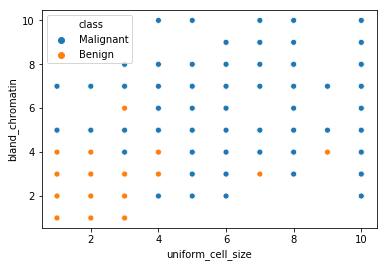

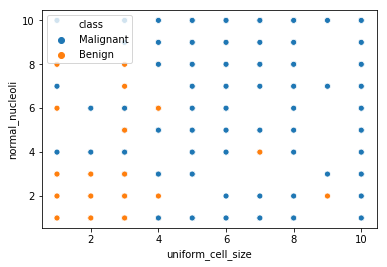

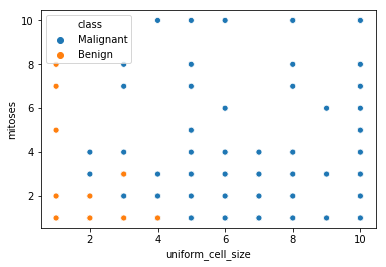

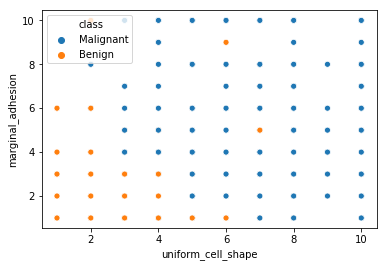

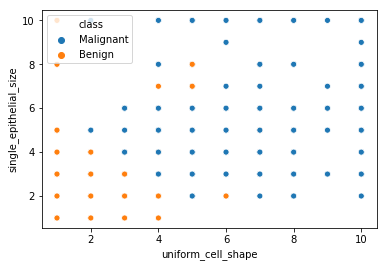

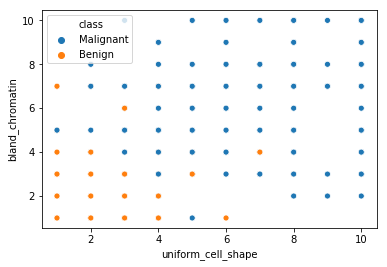

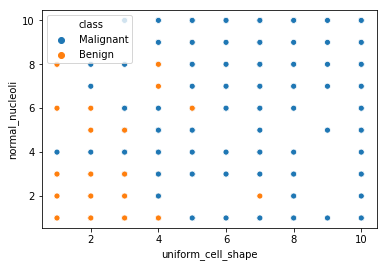

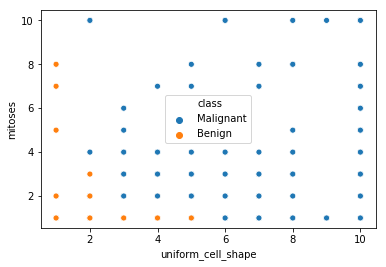

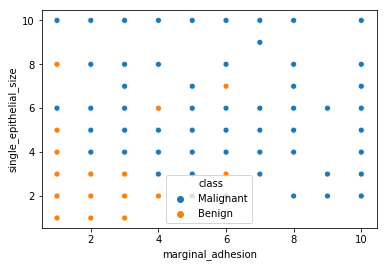

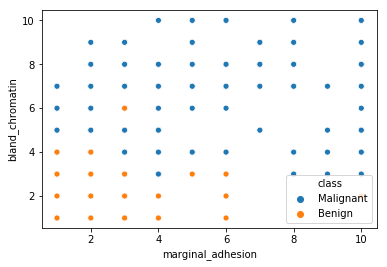

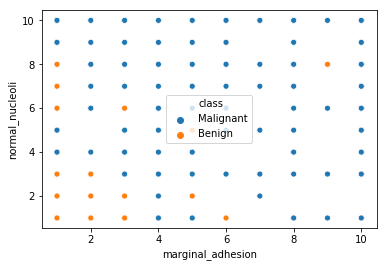

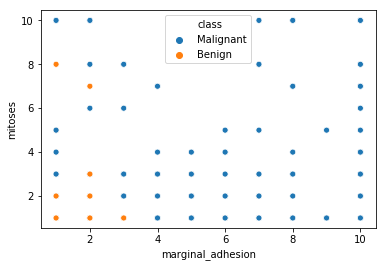

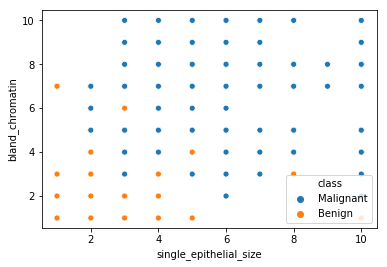

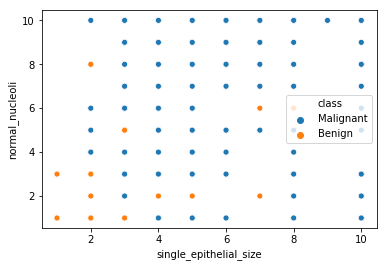

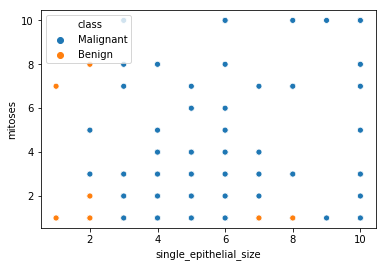

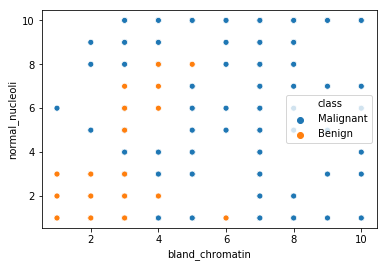

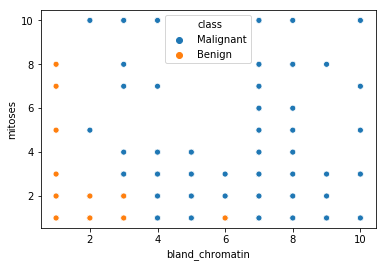

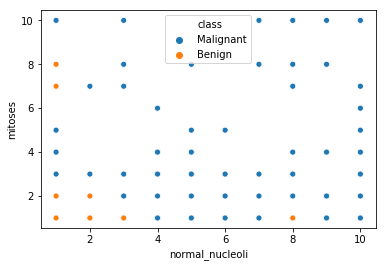

In [20]:
import seaborn as sns
for i in range(8):
    x = data_frame.iloc[:,i]
    for j in range(i+1,8):
        y = data_frame.iloc[:,j]
        hue_parameter = data_frame['class']
        ax = sns.scatterplot(x=x, y=y, hue=hue_parameter)
        plt.show()

The scatter plots between two of the features in the dataframe is generated. Blue points represet "Malignant" class whereas orange points represent "Benign" Class. In many of the plots plotted here, we can see a distinction between classes or existence of a boundary of sort between malignant and benign classes. This directs to use a classification algorithm which decides classes based on some diving boundary. Here SVC (support vector classifier) is used to reach that goal.

In [21]:
X = data_frame_1.drop(columns='class').values
Y = data_frame_1['class'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)

from sklearn.svm import SVC
model = SVC()
model.fit(train_x, train_y)

y_true = test_y
y_predict = model.predict(test_x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = confusion_matrix(y_true, y_predict)
print(confusion_matrix_1)

[[93  3]
 [ 0 44]]


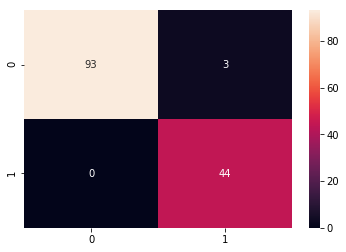

In [23]:
sns.heatmap(confusion_matrix_1, annot=True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict))


              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98        96
   Malignant       0.94      1.00      0.97        44

   micro avg       0.98      0.98      0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_predict))

0.9785714285714285


The results for confusion matrix, f1_score and the accuracy score are satisfactorily high. We dont need further analysis to evaluate this model. This model works well for this problem.

Contact at shivam.mishra9868@gmail.com for any suggestions or improvements. You can also connect on LinkedIn at www.linkedin.com/in/shivam-mishra-207 